In [1]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# !nrnivmodl mod/

import matplotlib
import os

os.chdir('../sim')

from netpyne import specs, sim
import pickle, json
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'subNets_test0'
cfg.saveFolder = '../info/test/'+cfg.simLabel
cfg.savePickle = False
cfg.saveJson = False
cfg.saveDataInclude = ['simConfig','simData'] ## , 'netParams', 'simConfig', 
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = True
cfg.saveCellConns = False

In [2]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']

# layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
# 'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

layer = {'1':[0.040, 0.041], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.2,0.201], '4':[0.400,0.401], '5': [0.412,0.664], '6': [0.800,0.801], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

In [3]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
# folder = os.listdir('cell_data/')

cfg.S1pops = ['L1_DLAC_cNAC187', 'L23_PC_cADpyr229', 'L4_DBC_bIR215', 'L6_TPC_L4_cADpyr231']

cellName = {}
cellnumber = 0
for popName in cfg.S1pops:
    for number in range(1,6):
        ruleLabel = popName + '_' + str(number)
        cellName[cellnumber] = ruleLabel
        netParams.loadCellParamsRule(label = ruleLabel, fileName = 'cell_data/' + ruleLabel + '/' + ruleLabel + '_cellParams.pkl')    
        netParams.renameCellParamsSec(label=cellName[cellnumber], oldSec='soma_0', newSec='soma')
        cellnumber = cellnumber + 1


for popName in cfg.S1pops:
    for number in range(1,6):
        cellName = popName + '_' + str(number)
        layernumber = popName[1:2]
        if layernumber == '2':
            netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                            'xnormRange': [0.1+0.2*(number-1),0.1+0.2*(number-1)],
                                             'znormRange': [0.5, 0.5],'numCells': 1}
        else:
            netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                            'xnormRange': [0.1+0.2*(number-1),0.1+0.2*(number-1)],
                                             'znormRange': [0.5, 0.5],'numCells': 1}

## Run small Nets in a sigle job

In [4]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
# sim.net.connectCells()            			# create connections between cells based on params
# sim.net.addStims() 							# add network stimulation
# sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
# sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()  


Start time:  2021-08-02 22:47:25.025174

Creating network of 20 cell populations on 1 hosts...
  Number of cells on node 0: 20 
  Done; cell creation time = 0.33 s.

Gathering data...
  Done; gather time = 0.29 s.

Analyzing...
  Cells: 20
  Connections: 0 (0.00 per cell)


{spkt: {}, _repr_mimebundle_: {}}

## Net infos

Plotting 2D representation of network cell locations and connections...


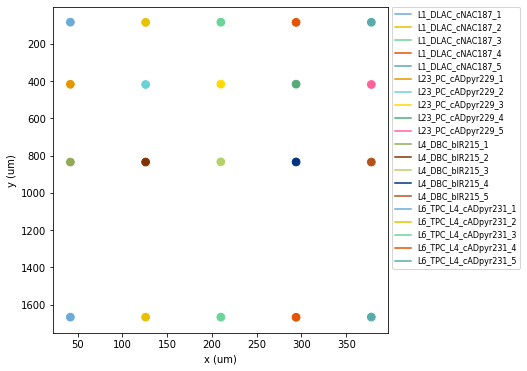

In [5]:
sim.analysis.plot2Dnet(view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(6, 6), fontSize=8, saveData=None, 
                               saveFig=True, showFig=True, lineWidth=0.1);

Plotting 3D cell shape ...


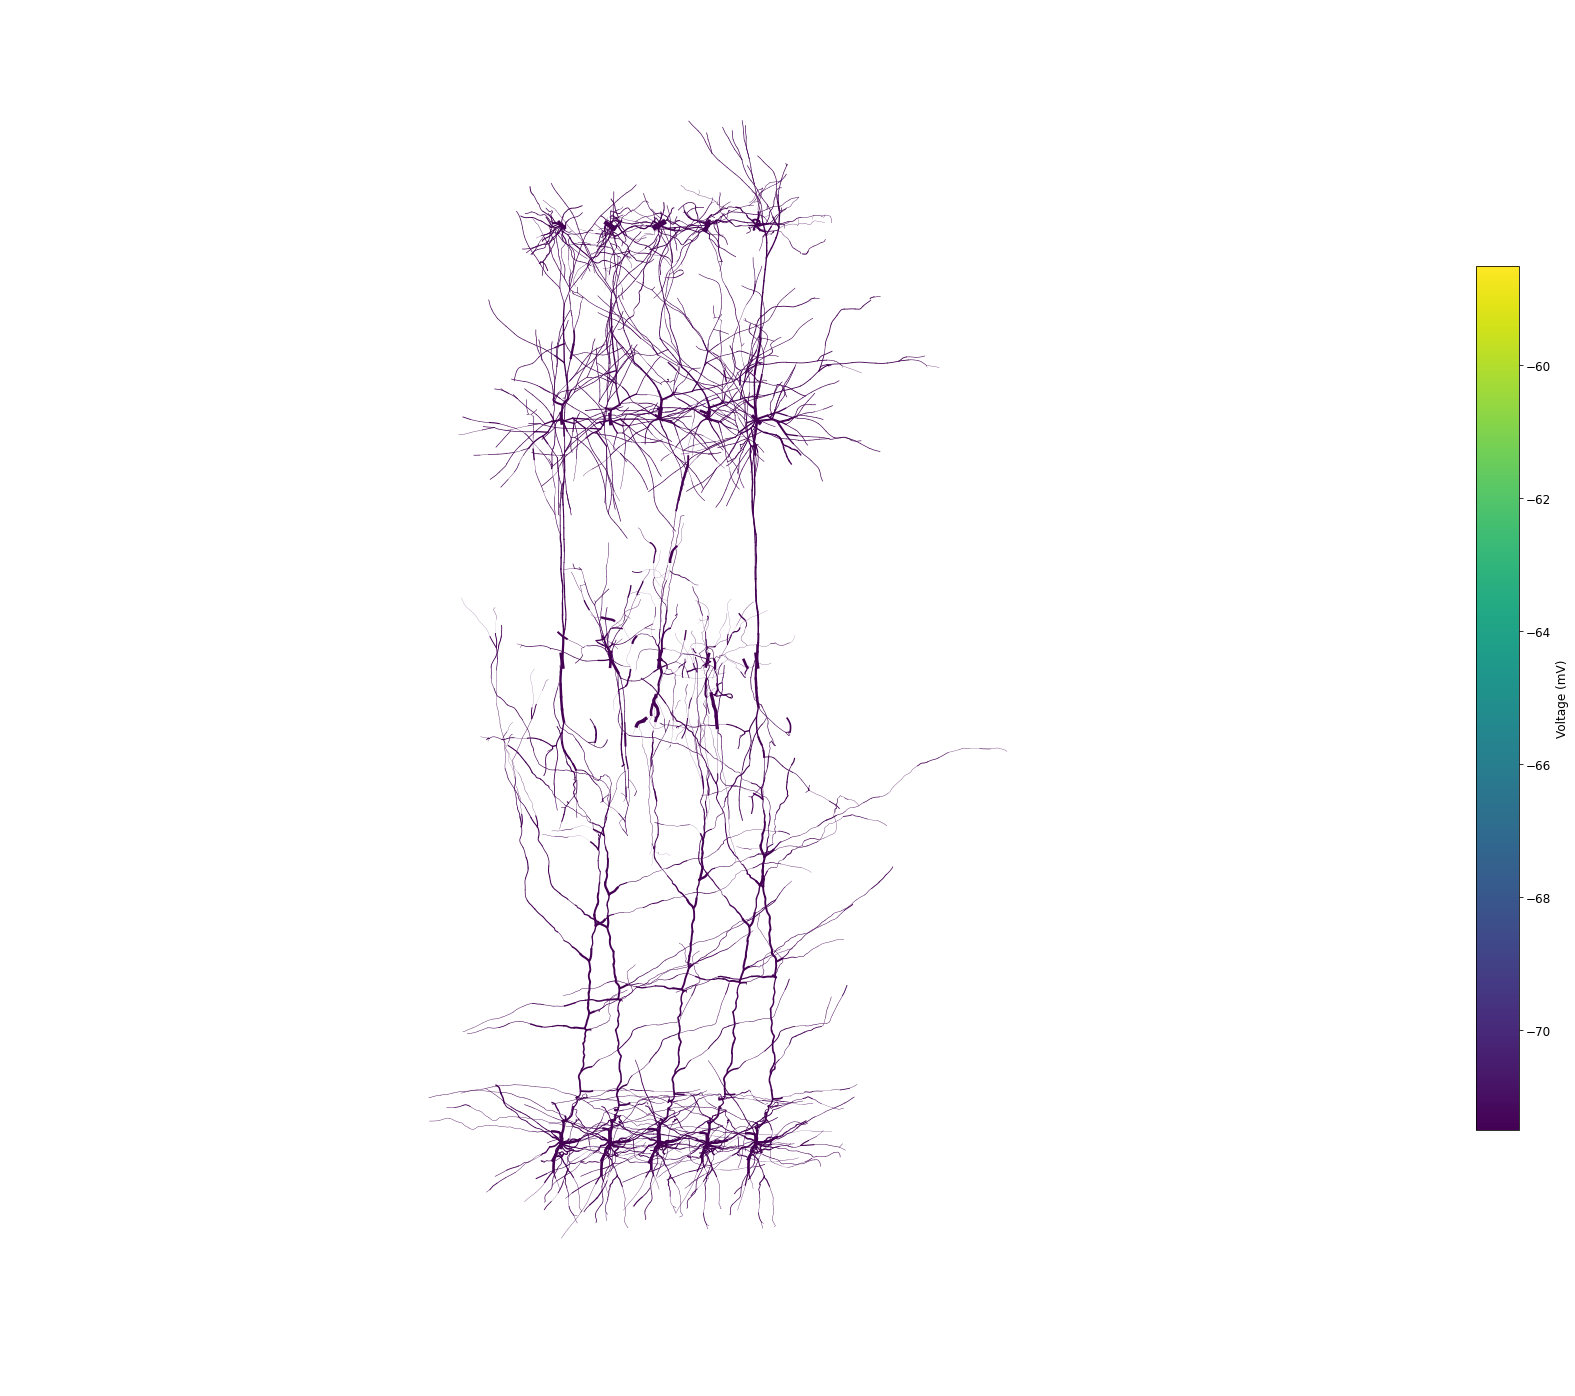

(<Figure size 1728x1728 with 2 Axes>, {})

In [6]:
sim.analysis.plotShape(showFig=True, includeAxon=False, showSyns=False, dist= 0.65, cvar= 'voltage', axis='off',saveFig=True, figSize=(24,24), dpi= 600)

# cfg.analysis['plotShape'] = {'includePre': cfg.cellsrecShape, 'includePost': cfg.cellsrecShape, 'showFig': False, 'includeAxon': False, 
#                             'showSyns': False, 'saveFig': True, 'dist': 0.55, 'cvar': 'voltage', 'figSize': (24,12), 'dpi': 600}

In [7]:
netpyne_geppetto.netParams = netParams
netpyne_geppetto.simConfig = cfg


NameError: name 'netpyne_geppetto' is not defined